# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

### Грузим данные

Считаем описание данных

In [4]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [5]:
df_descr.style.set_properties(subset=['ОПИСАНИЕ'], **{'width': '500px'})

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,"социальный статус клиента относительно работы (1 - работает, 0 - не работает)"
3,SOCSTATUS_PENS_FL,"социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)"
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [6]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [7]:
df_train.shape

(15223, 52)

In [8]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [9]:
df_test.shape

(14910, 52)

In [10]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [11]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [12]:
df_train.head(2)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train


In [13]:
df = df_test.append(df_train).reset_index(drop=True)

In [14]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [16]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Высшее', 'Среднее', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное', 'Неполное среднее'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Сельское хозяйство', 'СМИ/Реклама/PR-агенства', 'Нефтегазовая промышленность', 'Банк/Финансы', 'Строительство', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Здравоохранение', 'Другие сферы', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Туризм', 'ЧОП/Детективная д-ть', 'Страхование', 'Юридические услуги/нотариальные услуги', 'Информационные услуги', 'Управляющая компания', 'Маркетинг', 'Логистика', 'Торговля', 'Наука', 'Недвижимость', 'Государственная служба', 'Энергетика', 'Салоны красоты и здоровья', 'Сборочные производства', 'Информационные технологии', 'Подбор персонала', 'Транспорт', 'Развлечения/Искусство', 'Коммунальное хоз-во/Дорожные службы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [17]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Да, пропуски в данных есть:
* GEN_INDUSTRY                  27420 non-null object
* GEN_TITLE                     27420 non-null object
* ORG_TP_STATE                  27420 non-null object
* ORG_TP_FCAPITAL               27425 non-null object
* JOB_DIR                       27420 non-null object
* TP_PROVINCE                   29543 non-null object
* REGION_NM                     30131 non-null object
* WORK_TIME                     27416 non-null float64
* PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

1) Столбец PREVIOUS_CARD_NUM_UTILIZED заполним нулями, так указано в описании имеем: количество уже утилизированных карт ( если пусто - 0)
   df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(value=0)

2) Одним из важных столбцов является 'TP_PROVINCE', но у нас по нему 590 пропусков. Возможно следует ввести новый столбец с 1, если есть    информация, что человек обращался за кредитом, и 0 если таких данных нет, а столбец 'TP_PROVINCE' удалить

3) Столбец REGION_NM  -  поскольку у нас всего два пропущенных значения, можем эти данные заполнить, сопоставив с фактическим адресом проживания в ручную. При большом объеме данных, лучше создать dictionary для сопоставления данных.
df[(df['REGION_NM'].isnull())]['FACT_ADDRESS_PROVINCE']  - ЗАПАДНО-СИБИРСКИЙ'

4) Столбец GEN_TITLE - При проверке оказалось, что только один работающий человек не указал должность - для него мы воспользуемся значением 'Другое'. Все работающие пенсионеры указали должность, для всех не работающих пенсионеров можно ввести значение - не работает, что фактически будет повторять существующий уже столбец, или использовать значение 'Другое'. (Остановимся на последнем).

5) WORK_TIME - для всеx, не указавших эти данные, проставляем 0, предполагая, что это либо не работающие пенисионеры, или человек только начал работать на данном месте работы (фактически, только один работающий не пенсионер не указал WORK_TIME)

df[((df['SOCSTATUS_WORK_FL'] == 1) & (df['SOCSTATUS_PENS_FL'] == 0)) & (df['WORK_TIME'].isnull())]

4) Остальные колонки с данными о направлении деятельности компании и отношение к иностранному капиталу, на данном этапе можно удалить и попробовать классифицировать без них


In [105]:
df[(df['REGION_NM'].isnull())]['FACT_ADDRESS_PROVINCE']

3099     Новосибирская область
17420    Новосибирская область
Name: FACT_ADDRESS_PROVINCE, dtype: object

In [110]:
df[((df['SOCSTATUS_WORK_FL'] == 1) & (df['SOCSTATUS_PENS_FL'] == 0)) & (df['WORK_TIME'].isnull())]

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
22873,64469089,0,24,1,0,0,0,0,Среднее специальное,Не состоял в браке,...,0,1,0,5,1,1,540,540,NaN,train


In [72]:
# Заполним поле PREVIOUS_CARD_NUM_UTILIZED нулями, т.к. в описании имеем: количество уже утилизированных карт ( если пусто - 0) - используем это в фунции ниже
# df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(value=0)

In [74]:
# Заполним поле GEN_TITLE - 'Другое' , только один работающий человек не указал должность.Все работающие пенсионеры указали должность. Все, кто не указал должность -  не работающие пенсионеры - к ним может подойти 'Другое', т.к они получают доход 
# df[(df['SOCSTATUS_WORK_FL'] == 1) & (df['GEN_TITLE'].isnull())]['AGREEMENT_RK'].count() # answer 1 - один работающий человек не указал должность
# df[((df['SOCSTATUS_PENS_FL'] == 1) & (df['SOCSTATUS_WORK_FL'] == 1)) &  (df['GEN_TITLE'].isnull())]['AGREEMENT_RK'].count() # answer 0 - Все работающие пенсионеры указали должность. 
# df[((df['SOCSTATUS_PENS_FL'] == 1) & (df['SOCSTATUS_WORK_FL'] == 0)) &  (df['GEN_TITLE'].isnull()) ] #Все, кто не указал должность -  не работающие пенсионеры - к ним может подойти 'Другое', т.к они получают доход 
# df['GEN_TITLE'] = df['GEN_TITLE'].fillna(value='Другое')
#- используем это в фунции ниже

In [82]:
df[df['TP_PROVINCE'].isnull()]['AGREEMENT_RK'].count()

590

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

У нас достаточно большое количество столбцов строковых (object), с небольшим количеством уникальных значений:  
* EDUCATION
* MARITAL_STATUS
* GEN_INDUSTRY
* GEN_TITLE
* ORG_TP_STATE
* ORG_TP_FCAPITAL
* JOB_DIR
* All Addresses 
* TP_PROVINCE 
* REGION_NM
* FAMILY_INCOME
С некоторыми из полей необходимо поработать, а потом можно категоризовать, используя dummy-кодирование или используя простейший кодировщик, который каждой категории сопоставляет целое число. Можно попробовать оба метода и сопоставить результаты. Другие же столбцы при первой попытке попробуем удалить и поработать без них.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [18]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # delete identifier 
    df_output = df_output.drop(['AGREEMENT_RK'], axis = 1)
    
    # work with columns which should be float not an object
    df_output['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # fill PREVIOUS_CARD_NUM_UTILIZED with zeros where applicable
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(value=0)
    
    # cheking if client had previous credit history
    df_output['IS_CREDIT'] = df_output['TP_PROVINCE'].apply(lambda x: int(0) if pd.isnull(x) else int(1) )
    
    #drop column TP_PROVINCE
    df_output = df_output.drop(['TP_PROVINCE'], axis = 1)
    
    # column REGION_NM two nan values, was checked manually, will add values 
    df_output['REGION_NM'] =  df_output['REGION_NM'].fillna('ЗАПАДНО-СИБИРСКИЙ')
    
    # column GEN_TITLE, as we talked previously
    df_output['GEN_TITLE'] =  df_output['GEN_TITLE'].fillna('Другое')
    
    # column WORK_TIME
    df_output['WORK_TIME'] =  df_output['WORK_TIME'].fillna(0)
    
    # drop all other columns with nan
    df_output = df_output.drop(['GEN_INDUSTRY'], axis = 1)
    df_output = df_output.drop(['ORG_TP_STATE'], axis = 1)
    df_output = df_output.drop(['ORG_TP_FCAPITAL'], axis = 1)
    df_output = df_output.drop(['JOB_DIR'], axis = 1)
    
    # going to leave just fact address, because we have columns 
    # which provide us information about equality of those addresses
    df_output = df_output.drop(['POSTAL_ADDRESS_PROVINCE'], axis = 1)
    df_output = df_output.drop(['REG_ADDRESS_PROVINCE'], axis = 1)
    df_output = pd.get_dummies(df_output, columns=['EDUCATION',
'MARITAL_STATUS',
'GEN_TITLE',
'FAMILY_INCOME',
'FACT_ADDRESS_PROVINCE',
'REGION_NM'])
    
    return df_output

In [19]:
df_output = preproc_data(df)
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 163 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(32), object(1), uint8(123)
memory usage: 12.6+ MB


In [20]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [21]:
X = df_train_preproc .drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [25]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)


c:\program files (x86)\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_train_test)
dtc_predict_proba = dtc.predict_proba(X_train_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_train_test)
rfc_predict_proba = rfc.predict_proba(X_train_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict= lr.predict(X_train_test)
lr_predict_proba = lr.predict_proba(X_train_test)
    

In [60]:
# test/ check
from sklearn.metrics import accuracy_score
accuracy_score(y_train_test,lr_predict)

0.8780380994088023

In [57]:
rfc_predict_proba


array([[1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       ...,
       [0.9, 0.1],
       [1. , 0. ],
       [0.9, 0.1]])

In [61]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('For DecisionTreeClassifier:')
print('precision', precision_score(y_train_test, dtc_predict))
print('recall', recall_score(y_train_test, dtc_predict))
print('accuracy', accuracy_score(y_train_test, dtc_predict))
print('\n')

print('For RandomForestClassifier:')
print('precision', precision_score(y_train_test, rfc_predict))
print('recall', recall_score(y_train_test, rfc_predict))
print('accuracy', accuracy_score(y_train_test, rfc_predict))
print('\n')

print('For LogisticRegression:')
print('precision', precision_score(y_train_test, lr_predict))
print('recall', recall_score(y_train_test, lr_predict))
print('accuracy', accuracy_score(y_train_test, lr_predict))
print('\n')


For DecisionTreeClassifier:
precision 0.1726078799249531
recall 0.16576576576576577
accuracy 0.8020582439238012


For RandomForestClassifier:
precision 0.2
recall 0.007207207207207207
accuracy 0.875848478213269


For LogisticRegression:
precision 0.3333333333333333
recall 0.0036036036036036037
accuracy 0.8780380994088023




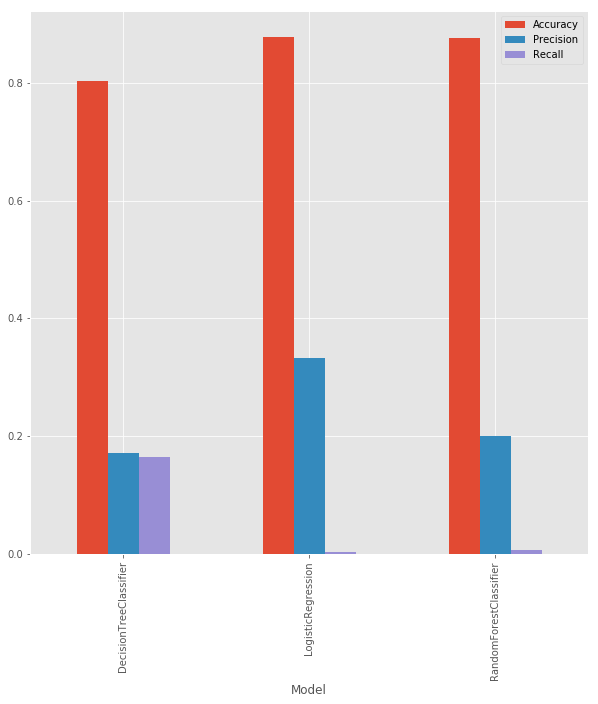

In [62]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
statDataFrame = pd.DataFrame(data={
    'Model': [
        'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'
    ], 
    'Accuracy': [
        accuracy_score(y_train_test, dtc_predict),
        accuracy_score(y_train_test, rfc_predict),
        accuracy_score(y_train_test, lr_predict)
    ], 
    'Precision': [
        precision_score(y_train_test, dtc_predict),
        precision_score(y_train_test, rfc_predict),
        precision_score(y_train_test, lr_predict)
    ], 
    'Recall': [
        recall_score(y_train_test, dtc_predict),
        recall_score(y_train_test, rfc_predict),
        recall_score(y_train_test, lr_predict)
    ]})

fig, ax = plt.subplots(figsize=(10,10))
statDataFrame.pivot_table(statDataFrame, index=['Model']).plot(kind='bar', stacked=False, ax=ax)


DecisionTreeClassifier 0.5279227632418062
RandomForestClassifier 0.6095162710067994
LogisticRegression 0.6363234620462935


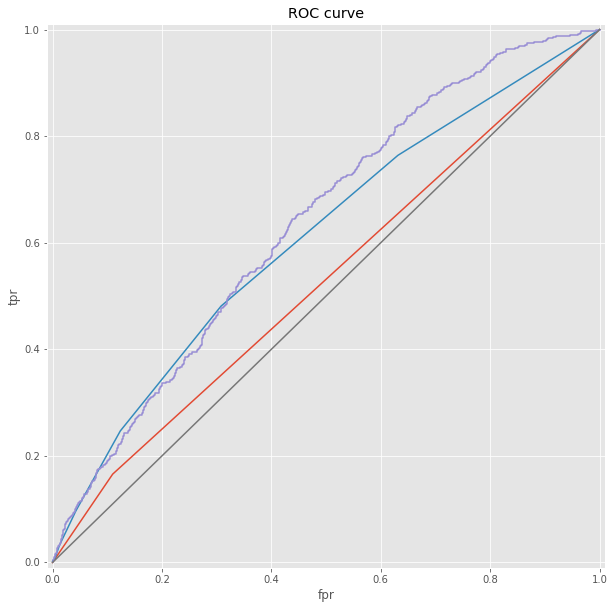

In [66]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_train_test, dtc_predict_proba[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_train_test, rfc_predict_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_train_test, lr_predict_proba[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))


print('DecisionTreeClassifier', roc_auc_score(y_train_test, dtc_predict_proba[:,1]))
print('RandomForestClassifier', roc_auc_score(y_train_test, rfc_predict_proba[:,1]))
print('LogisticRegression', roc_auc_score(y_train_test, lr_predict_proba[:,1]))

In [80]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X_train, y_train)

#DecisionTree
dtc_roc_auc = cross_val_score(
    dtc,
    X_train, 
    y_train,
    scoring='roc_auc',
    cv=cv
).mean()

print('DecisionTreeClassifier roc_auc:',  dtc_roc_auc)


DecisionTreeClassifier roc_auc: 0.5247959476387931


In [82]:
#RandomForestClassifier 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X_train, y_train)
rfc_roc_auc = cross_val_score(
    rfc,
    X_train, 
    y_train,
    scoring='roc_auc',
    cv=cv
).mean()

print('RandomForestClassifier roc_auc:',  rfc_roc_auc)

RandomForestClassifier roc_auc: 0.603436383852705


In [83]:
#LogisticRegression  
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X_train, y_train)
lr_roc_auc = cross_val_score(
    lr,
    X_train, 
    y_train,
    scoring='roc_auc',
    cv=cv
).mean()

print('LogisticRegression  roc_auc:',  lr_roc_auc)

LogisticRegression  roc_auc: 0.6293612932121844


In [85]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

classifier_lr = LogisticRegression()
classifier_lr.fit(X, y)
classifierPredictProba = classifier_lr.predict_proba(X_test)

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [87]:
# Померить roc_auc на тесте
roc_auc_score(y_test, classifierPredictProba[:,1])

0.624737299174989

(-0.01, 1.01)

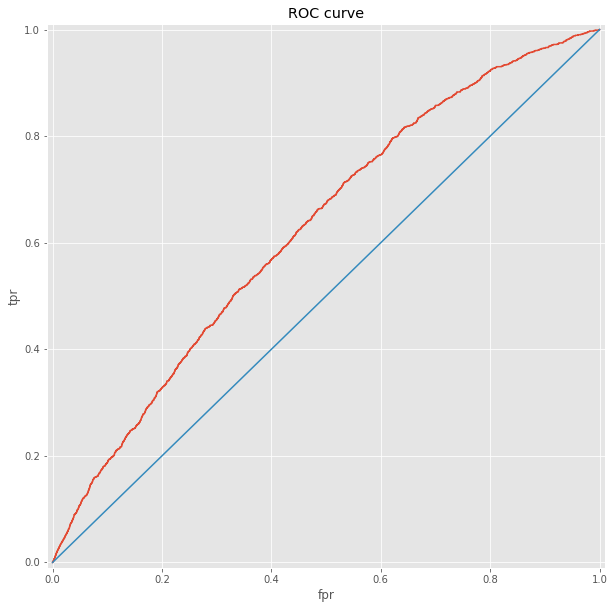

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, classifierPredictProba[:,1])

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))